In [1]:
import json
import re
import os
import networkx as nx
import matplotlib.pyplot as plt

newsgroups = os.listdir("./newsgroups")
newsgroups.remove("list.csv")
graphs = {}
message_id_pattern = re.compile(r'<[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}>')  # Matches Message-IDs
email_pattern = re.compile(r'\b[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}\b')
for title in newsgroups:
    G = nx.DiGraph()
    with open(title.replace(".txt","")+".json", 'r', encoding="utf-8") as file:
        data = json.load(file)
    for i,post in enumerate(data):
        if "alt.atheism" in title and i == 0:
            #skip first post in alt.atheism (doesn't have standard post metadata)
            print("skipping first", i)
            continue
        sender_email = email_pattern.search(post["sender"].lower())
        if sender_email == None:
            #If no email found, skip
            continue
        sender_email = sender_email.group(0)
        #print(sender_email)
        G.add_node(sender_email)
        #print(post)
        content = post["content"].lower()
        emails = email_pattern.findall(content)
        #print("Emails:\n ", emails)
        message_ids = message_id_pattern.findall(content)
        message_ids_san = [mes_id.strip('<>') for mes_id in message_ids]
        #print("Message IDs:\n ",message_ids_san)
        
        emails_filtered = [email for email in emails if email not in message_ids_san]
        for email in emails_filtered:
            if email != sender_email:
                G.add_edge(sender_email,email)
            else:
                email = email
                #print(email,"is equal to",sender_email)
        
        #print("Filtered:\n ",emails_filtered)
    graphs[title.replace(".txt","")] = G

skipping first 0


### Run this cell multiple times, cause every time it removes isolated nodes other isolated nodes are created and it keeps going until a certain point. (we can discuss what we gonna do about that later)

In [60]:
newsgroups_graphs = {}

for title, graph in graphs.items():
    print(title)
    print("The total number of nodes:", len(graph.nodes()))
    G = graph

    isolated = [node for node in G.nodes if G.degree(node) <= 1]
    G.remove_nodes_from(isolated)
    largest_component = max(nx.weakly_connected_components(G), key=len)
    G_largest = G.subgraph(largest_component).copy()
    pos = nx.spring_layout(G_largest)

    newsgroups_graphs[title] = G_largest
    '''
    plt.figure(figsize=(12, 8))
    nx.draw_networkx_nodes(G_largest, pos, node_size=50, node_color="skyblue")
    nx.draw_networkx_edges(G_largest, pos, alpha=0.6, width=1.5, edge_color="gray")

    plt.title(f"Visualization of the largest component in: {title}", fontsize=14)
    plt.axis("off")
    plt.show()'''

sci.crypt
The total number of nodes: 248
comp.sys.mac.hardware
The total number of nodes: 195
misc.forsale
The total number of nodes: 44
soc.religion.christian
The total number of nodes: 207
rec.sport.baseball
The total number of nodes: 251
rec.sport.hockey
The total number of nodes: 244
comp.sys.ibm.pc.hardware
The total number of nodes: 213
talk.politics.guns
The total number of nodes: 246
rec.autos
The total number of nodes: 281
alt.atheism
The total number of nodes: 176
comp.os.ms-windows.misc
The total number of nodes: 286
sci.electronics
The total number of nodes: 256
comp.windows.x
The total number of nodes: 198
talk.religion.misc
The total number of nodes: 210
talk.politics.mideast
The total number of nodes: 184
sci.med
The total number of nodes: 253
rec.motorcycles
The total number of nodes: 287
comp.graphics
The total number of nodes: 650
sci.space
The total number of nodes: 264
talk.politics.misc
The total number of nodes: 234


In [24]:
'''newsgroups = []
nodes_count = []
edges_count = []

for title, graph in newsgroups_graphs.items():
    newsgroups.append(title)
    nodes_count.append(len(graph.nodes()))
    edges_count.append(len(graph.edges()))

plt.figure(figsize=(12, 6))
bars_nodes = plt.bar(newsgroups, nodes_count, color='skyblue', label='Number of Nodes')
plt.xlabel('Newsgroups', fontsize=12)
plt.ylabel('Number of Nodes', fontsize=12)
plt.title('Number of Nodes in Each Newsgroup Network', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

for bar in bars_nodes:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=10)

plt.show()

plt.figure(figsize=(12, 6))
bars_edges = plt.bar(newsgroups, edges_count, color='salmon', label='Number of Edges')
plt.xlabel('Newsgroups', fontsize=12)
plt.ylabel('Number of Edges', fontsize=12)
plt.title('Number of Edges in Each Newsgroup Network', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

for bar in bars_edges:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=10)

plt.show()'''

"newsgroups = []\nnodes_count = []\nedges_count = []\n\nfor title, graph in newsgroups_graphs.items():\n    newsgroups.append(title)\n    nodes_count.append(len(graph.nodes()))\n    edges_count.append(len(graph.edges()))\n\nplt.figure(figsize=(12, 6))\nbars_nodes = plt.bar(newsgroups, nodes_count, color='skyblue', label='Number of Nodes')\nplt.xlabel('Newsgroups', fontsize=12)\nplt.ylabel('Number of Nodes', fontsize=12)\nplt.title('Number of Nodes in Each Newsgroup Network', fontsize=14)\nplt.xticks(rotation=45, ha='right')\nplt.tight_layout()\n\nfor bar in bars_nodes:\n    yval = bar.get_height()\n    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=10)\n\nplt.show()\n\nplt.figure(figsize=(12, 6))\nbars_edges = plt.bar(newsgroups, edges_count, color='salmon', label='Number of Edges')\nplt.xlabel('Newsgroups', fontsize=12)\nplt.ylabel('Number of Edges', fontsize=12)\nplt.title('Number of Edges in Each Newsgroup Network', fontsize=14)

In [25]:
'''for title, graph in newsgroups_graphs.items():
    in_degrees = [d for n, d in graph.in_degree()]
    out_degrees = [d for n, d in graph.out_degree()]

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.hist(in_degrees, bins=100, color='skyblue')
    plt.title(f'In-Degree Distribution for {title}')
    plt.xlabel('In-Degree')
    plt.ylabel('Number of nodes')

    plt.subplot(1, 2, 2)
    plt.hist(out_degrees, bins=100, color='salmon')
    plt.title(f'Out-Degree Distribution for {title}')
    plt.xlabel('Out-Degree')
    plt.ylabel('Number of nodes')
    plt.tight_layout()
    plt.show()'''

"for title, graph in newsgroups_graphs.items():\n    in_degrees = [d for n, d in graph.in_degree()]\n    out_degrees = [d for n, d in graph.out_degree()]\n\n    plt.figure(figsize=(12, 6))\n\n    plt.subplot(1, 2, 1)\n    plt.hist(in_degrees, bins=100, color='skyblue')\n    plt.title(f'In-Degree Distribution for {title}')\n    plt.xlabel('In-Degree')\n    plt.ylabel('Number of nodes')\n\n    plt.subplot(1, 2, 2)\n    plt.hist(out_degrees, bins=100, color='salmon')\n    plt.title(f'Out-Degree Distribution for {title}')\n    plt.xlabel('Out-Degree')\n    plt.ylabel('Number of nodes')\n    plt.tight_layout()\n    plt.show()"

In [26]:
'''def plot_log_log_degree_distribution(axes, graph, title, index):
    degrees = [deg for node, deg in graph.degree()]
    degree_count = {}
    for degree in degrees:
        if degree not in degree_count:
            degree_count[degree] = 0
        degree_count[degree] += 1
    
    degree_values = sorted(degree_count.items())
    degrees, counts = zip(*degree_values)
    
    axes[index].loglog(degrees, counts, marker='o', linestyle='None', color='b')
    axes[index].set_xlabel('Degree (log scale)', fontsize=10)
    axes[index].set_ylabel('Frequency (log scale)', fontsize=10)
    axes[index].set_title(f'Log-Log Degree Distribution for {title}', fontsize=12)
    axes[index].grid(True, which="both", ls="--")

num_plots = len(newsgroups_graphs)
num_rows = (num_plots // 3) + (1 if num_plots % 3 != 0 else 0)

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 * num_rows))

axes = axes.flatten()

for i, (title, graph) in enumerate(newsgroups_graphs.items()):
    plot_log_log_degree_distribution(axes, graph, title, i)

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()'''

'def plot_log_log_degree_distribution(axes, graph, title, index):\n    degrees = [deg for node, deg in graph.degree()]\n    degree_count = {}\n    for degree in degrees:\n        if degree not in degree_count:\n            degree_count[degree] = 0\n        degree_count[degree] += 1\n    \n    degree_values = sorted(degree_count.items())\n    degrees, counts = zip(*degree_values)\n    \n    axes[index].loglog(degrees, counts, marker=\'o\', linestyle=\'None\', color=\'b\')\n    axes[index].set_xlabel(\'Degree (log scale)\', fontsize=10)\n    axes[index].set_ylabel(\'Frequency (log scale)\', fontsize=10)\n    axes[index].set_title(f\'Log-Log Degree Distribution for {title}\', fontsize=12)\n    axes[index].grid(True, which="both", ls="--")\n\nnum_plots = len(newsgroups_graphs)\nnum_rows = (num_plots // 3) + (1 if num_plots % 3 != 0 else 0)\n\nfig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 * num_rows))\n\naxes = axes.flatten()\n\nfor i, (title, graph) in enumerate(newsgrou

In [61]:
def analyze_connected_components(graph, title):
    scc = list(nx.strongly_connected_components(graph))
    largest_scc = max(scc, key=len)
    print(f"{title}:")
    print(f"  Total number of nodes: {len(graph.nodes())}")
    print(f"  Largest Strongly Connected Component size: {len(largest_scc)}")

for title, graph in newsgroups_graphs.items():
    analyze_connected_components(graph, title)

sci.crypt:
  Total number of nodes: 248
  Largest Strongly Connected Component size: 98
comp.sys.mac.hardware:
  Total number of nodes: 147
  Largest Strongly Connected Component size: 4
misc.forsale:
  Total number of nodes: 11
  Largest Strongly Connected Component size: 1
soc.religion.christian:
  Total number of nodes: 207
  Largest Strongly Connected Component size: 89
rec.sport.baseball:
  Total number of nodes: 233
  Largest Strongly Connected Component size: 68
rec.sport.hockey:
  Total number of nodes: 244
  Largest Strongly Connected Component size: 66
comp.sys.ibm.pc.hardware:
  Total number of nodes: 172
  Largest Strongly Connected Component size: 9
talk.politics.guns:
  Total number of nodes: 243
  Largest Strongly Connected Component size: 79
rec.autos:
  Total number of nodes: 274
  Largest Strongly Connected Component size: 80
alt.atheism:
  Total number of nodes: 176
  Largest Strongly Connected Component size: 74
comp.os.ms-windows.misc:
  Total number of nodes: 222


In [62]:
for title, graph in newsgroups_graphs.items():
    print(f"\nTop 5 nodes by degree for {title}:")
    node_degrees = graph.degree()
    sorted_node_degrees = sorted(node_degrees, key=lambda x: x[1], reverse=True)
    
    for i, (node, degree) in enumerate(sorted_node_degrees[:5]):
        print(f"{i+1}. Node: {node}, Degree: {degree}")


Top 5 nodes by degree for sci.crypt:
1. Node: strnlght@netcom.com, Degree: 70
2. Node: pat@rwing.uucp, Degree: 36
3. Node: pmetzger@snark.shearson.com, Degree: 36
4. Node: holland@cs.colostate.edu, Degree: 33
5. Node: smb@research.att.com, Degree: 30

Top 5 nodes by degree for comp.sys.mac.hardware:
1. Node: hades@coos.dartmouth.edu, Degree: 24
2. Node: hk.mlr@forsythe.stanford.edu, Degree: 16
3. Node: ferch@ucs.ubc.ca, Degree: 10
4. Node: carter@cae.wisc.edu, Degree: 10
5. Node: d88-jwa@hemul.nada.kth.se, Degree: 9

Top 5 nodes by degree for misc.forsale:
1. Node: koutd@hirama.hiram.edu, Degree: 4
2. Node: martimer@jaguar.wpi.edu, Degree: 4
3. Node: lazaro@pyuxf.cc.bellcore.com, Degree: 3
4. Node: martimer@bigwpi.wpi.edu, Degree: 3
5. Node: srfergu@rufus.erenj.com, Degree: 2

Top 5 nodes by degree for soc.religion.christian:
1. Node: mserv@mozart.cc.iup.edu, Degree: 22
2. Node: gt7122b@prism.gatech.edu, Degree: 21
3. Node: hudson@athena.cs.uga.edu, Degree: 20
4. Node: llo@uu4.psi.com

In [63]:
# Step 1: Create a dictionary of nodes for each network
network_nodes = {title: set(graph.nodes()) for title, graph in newsgroups_graphs.items()}

# Step 2: Check for overlaps and count common nodes
overlap_counts = {}

# Compare each pair of networks
for net1, nodes1 in network_nodes.items():
    for net2, nodes2 in network_nodes.items():
        if net1 != net2:
            # Use a sorted tuple as the key to avoid duplicates
            pair = tuple(sorted((net1, net2)))
            if pair not in overlap_counts:
                common_nodes = nodes1 & nodes2  # Intersection of sets
                overlap_counts[pair] = len(common_nodes)

# Step 3: Calculate the total number of common nodes across all pairs
total_common_nodes = sum(overlap_counts.values())

# Step 4: Print the total number of common nodes
print(f"Total number of common nodes across all pairs: {total_common_nodes}\n")

# Step 5: Sort the overlap_counts by the count in descending order
sorted_overlaps = sorted(overlap_counts.items(), key=lambda x: x[1], reverse=True)

# Step 6: Print sorted results
for (net1, net2), count in sorted_overlaps:
    print(f"Number of common nodes between {net1} and {net2}: {count}")

Total number of common nodes across all pairs: 347

Number of common nodes between alt.atheism and talk.religion.misc: 32
Number of common nodes between talk.politics.guns and talk.politics.misc: 27
Number of common nodes between rec.autos and rec.motorcycles: 15
Number of common nodes between talk.politics.misc and talk.religion.misc: 14
Number of common nodes between soc.religion.christian and talk.religion.misc: 10
Number of common nodes between comp.os.ms-windows.misc and comp.sys.ibm.pc.hardware: 10
Number of common nodes between sci.crypt and talk.politics.guns: 9
Number of common nodes between rec.sport.baseball and rec.sport.hockey: 8
Number of common nodes between rec.sport.baseball and talk.politics.misc: 8
Number of common nodes between alt.atheism and soc.religion.christian: 7
Number of common nodes between sci.med and soc.religion.christian: 7
Number of common nodes between talk.politics.guns and talk.religion.misc: 7
Number of common nodes between comp.graphics and comp.w

In [30]:
combined_graph = nx.DiGraph()

# Step 2: Merge nodes and edges from all graphs in newsgroups_graphs
for title, graph in newsgroups_graphs.items():
    for node in graph.nodes():
        combined_graph.add_node(node)
    for source, target in graph.edges():
        combined_graph.add_edge(source, target)

# Step 3: Analyze the combined graph
print(f"Combined Graph Stats:")
print(f"  Total Nodes: {combined_graph.number_of_nodes()}")
print(f"  Total Edges: {combined_graph.number_of_edges()}")

Combined Graph Stats:
  Total Nodes: 4306
  Total Edges: 11098


All the newsgroups that a user have posted are included in the plot

Total number of communities: 21


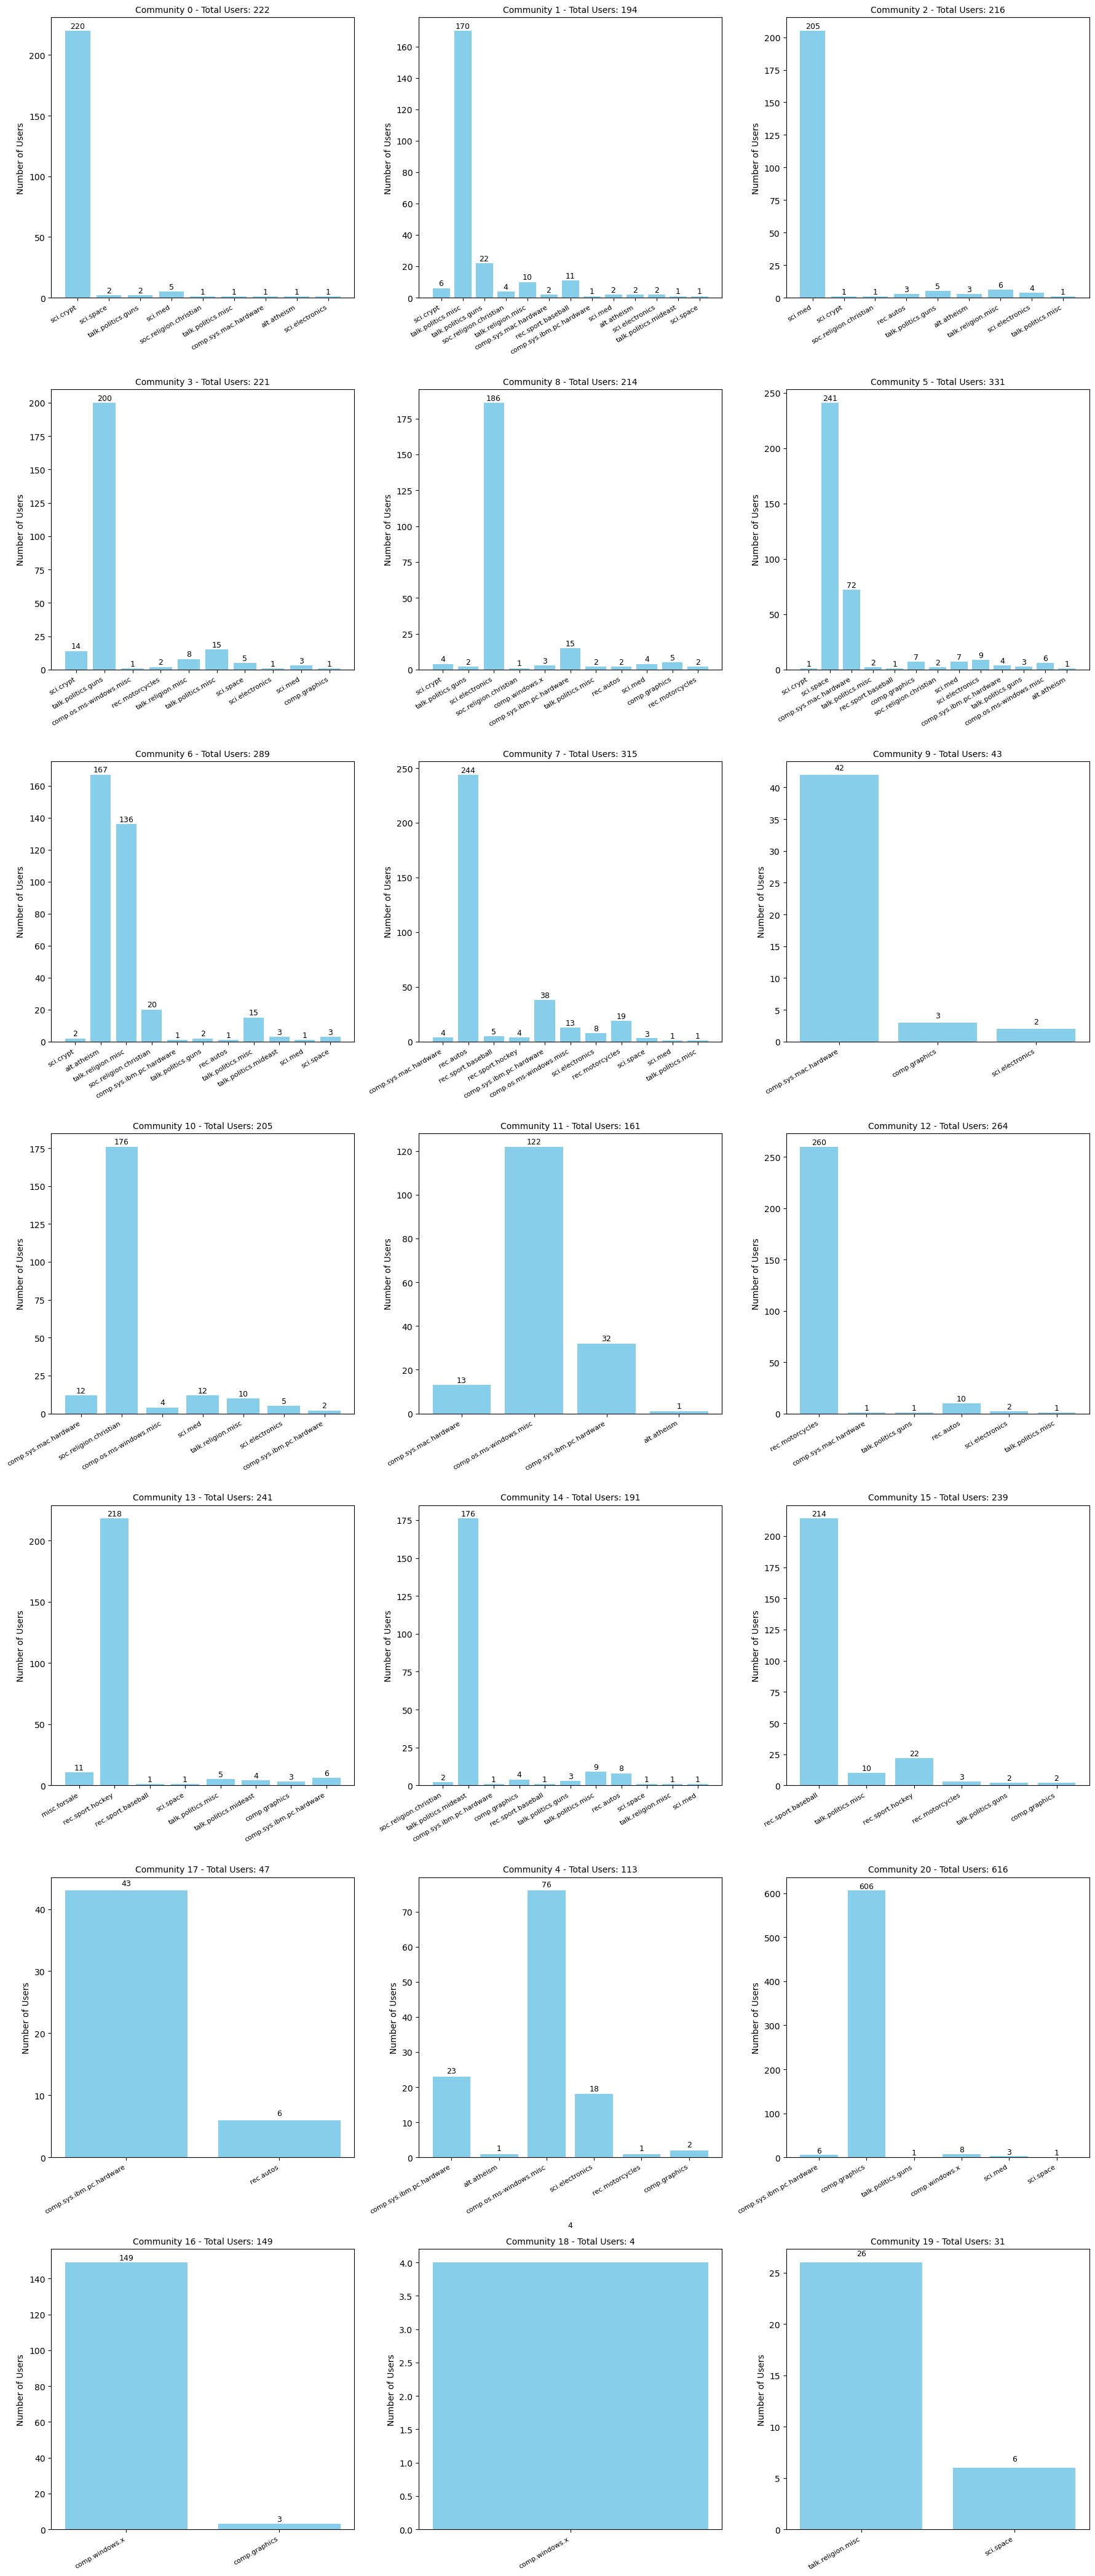

In [46]:
from community import best_partition
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
import random

# Set the seed for reproducibility
random.seed(10)  # You can choose any integer value

# Assuming combined_graph is the directed graph obtained from merging your smaller networks

# Step 1: Convert the directed graph to undirected
G_undir = combined_graph.to_undirected()

# Step 2: Find the largest connected component (works for undirected graphs)
largest_component = max(nx.connected_components(G_undir), key=len)
G_largest = G_undir.subgraph(largest_component).copy()

# Step 3: Community detection using the Louvain method (best_partition)
# Set the random seed to ensure stable community numbers across runs
partition = best_partition(G_largest, random_state=15)  # Add random_state parameter if supported

# Step 4: Analyze Communities

# Dictionary to store users by community
community_users = defaultdict(list)

# Collect the users for each community
for node, community_id in partition.items():
    community_users[community_id].append(node)

# Step 5: Count number of communities
num_communities = len(community_users)
print(f"Total number of communities: {num_communities}")

# Step 6: Update user_newsgroup_map to include all newsgroups for each user
user_newsgroup_map = defaultdict(set)  # Use a set to handle multiple newsgroups

for newsgroup, graph in newsgroups_graphs.items():
    for node in graph.nodes():
        user_newsgroup_map[node].add(newsgroup)  # Add newsgroup to the user's set of newsgroups

# Step 7: Plot the distribution in 3 bar charts per row
rows = (num_communities // 3) + (num_communities % 3 > 0)

fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(18, 6 * rows))
axes = axes.flatten()

for i, (community_id, users) in enumerate(community_users.items()):
    newsgroup_distribution = defaultdict(int)

    for user in users:
        if user in user_newsgroup_map:
            # Increment counts for all newsgroups the user belongs to
            for newsgroup in user_newsgroup_map[user]:
                newsgroup_distribution[newsgroup] += 1

    # Plot the distribution of newsgroups for this community on the current subplot
    ax = axes[i]
    bars = ax.bar(newsgroup_distribution.keys(), newsgroup_distribution.values(), color='skyblue')

    # Add the total number of users for this community at the top of the plot
    ax.set_title(f"Community {community_id} - Total Users: {len(users)}", fontsize=10)
    ax.set_ylabel('Number of Users')

    # Align the x-axis labels with the bars
    ax.set_xticks(range(len(newsgroup_distribution)))
    ax.set_xticklabels(newsgroup_distribution.keys(), rotation=30, fontsize=8, ha='right')

    # Add count labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{height}', ha='center', va='bottom', fontsize=9)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

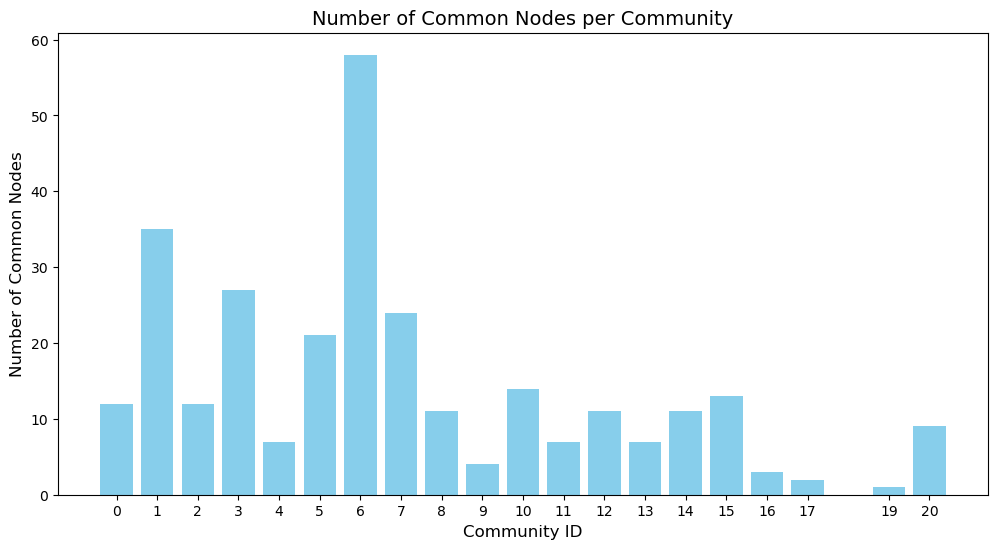

In [38]:
# Step 1: Identify common nodes across newsgroups
common_nodes = set()
all_nodes = set()

for graph in newsgroups_graphs.values():
    nodes = set(graph.nodes)
    common_nodes.update(nodes & all_nodes)  # Intersection with previous nodes
    all_nodes.update(nodes)  # Add all nodes to the pool

# Step 2: Count common nodes in each community
community_common_node_counts = {}

for node, community_id in partition.items():
    if node in common_nodes:
        if community_id not in community_common_node_counts:
            community_common_node_counts[community_id] = 0
        community_common_node_counts[community_id] += 1

# Optional: Visualize as a bar plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(
    community_common_node_counts.keys(),
    community_common_node_counts.values(),
    color="skyblue",
)
plt.xlabel("Community ID", fontsize=12)
plt.ylabel("Number of Common Nodes", fontsize=12)
plt.title("Number of Common Nodes per Community", fontsize=14)
plt.xticks(list(community_common_node_counts.keys()))
plt.show()

100%|██████████| 2000/2000 [01:10<00:00, 28.28it/s]


BarnesHut Approximation  took  28.55  seconds
Repulsion forces  took  38.87  seconds
Gravitational forces  took  0.31  seconds
Attraction forces  took  0.16  seconds
AdjustSpeedAndApplyForces step  took  1.58  seconds


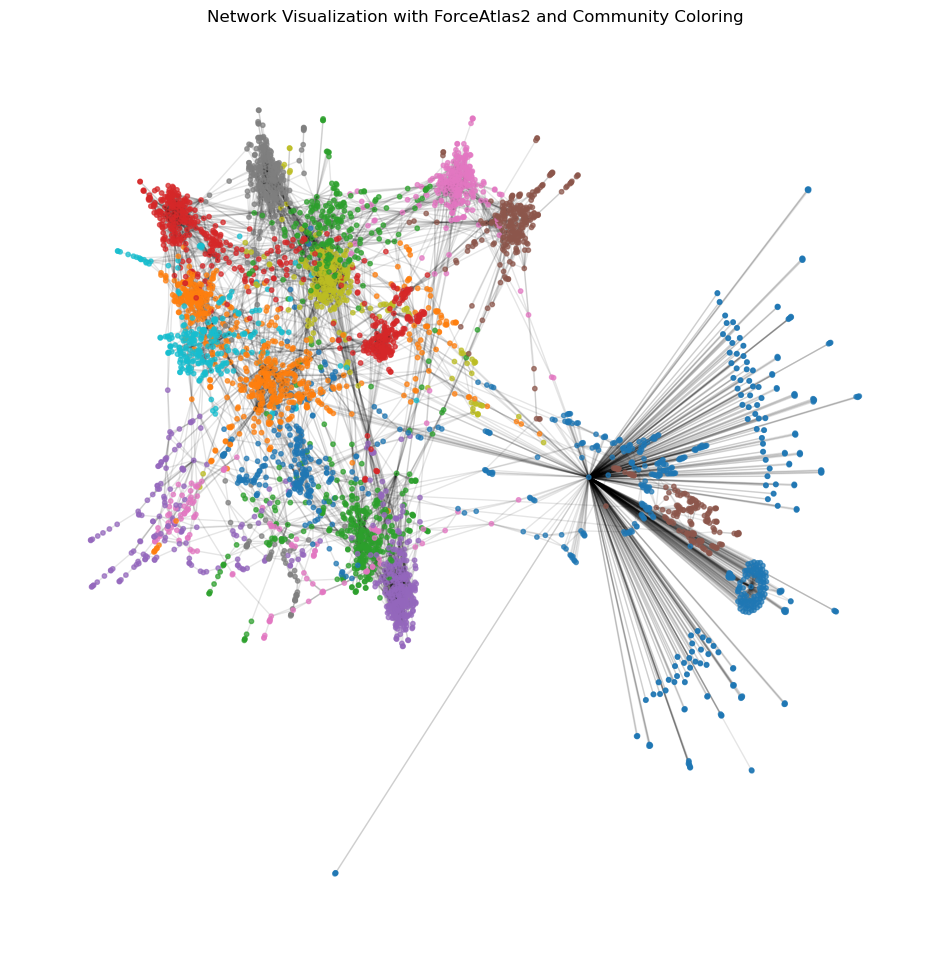

In [35]:
from fa2_modified import ForceAtlas2
import community
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Initialize ForceAtlas2
forceatlas2 = ForceAtlas2(
    # Behavior alternatives
    outboundAttractionDistribution=True,  # Dissuade hubs
    linLogMode=False,  # NOT IMPLEMENTED
    adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
    edgeWeightInfluence=1.0,

    # Performance
    jitterTolerance=1.0,  # Tolerance
    barnesHutOptimize=True,
    barnesHutTheta=1.2,
    multiThreaded=False,  # NOT IMPLEMENTED

    # Tuning
    scalingRatio=2.0,
    strongGravityMode=False,
    gravity=1.0,

    # Log
    verbose=True
)

# Get positions using ForceAtlas2 layout
positions = forceatlas2.forceatlas2_networkx_layout(G_undir, pos=None, iterations=2000)

# Calculate the community sizes and assign colors
community_sizes = {}
for node, com in partition.items():
    if com not in community_sizes:
        community_sizes[com] = 0
    community_sizes[com] += 1

# Sort communities by size and assign colors
top_communities = sorted(community_sizes, key=community_sizes.get, reverse=True)
colors = list(mcolors.TABLEAU_COLORS.keys())
community_color_map = {com: colors[i % len(colors)] for i, com in enumerate(top_communities)}

# Define neutral color for nodes that don't have an assigned community
neutral_color = "lightgray"

# Create a list of node colors based on community membership
node_colors = [
    community_color_map.get(partition[node], neutral_color) for node in G_undir.nodes()
]

# Plot the network with ForceAtlas2 layout and community coloring
plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(G_undir, positions, node_color=node_colors, node_size=10, alpha=0.7)
nx.draw_networkx_edges(G_undir, positions, edge_color="black", alpha=0.1)

# Set the title and hide the axes
plt.title("Network Visualization with ForceAtlas2 and Community Coloring")
plt.axis("off")

# Show the plot
plt.show()

High score indicates very strong community structure. Most nodes inside communities are connected, but not with nodes of other communities.(it was expected)

In [47]:
modularity_score = community.modularity(partition, G_undir)

modularity_score

0.8456997455113402